In [1]:
import pyomo.environ as pyo
import pyomo.gdp as gdp
import numpy as np
import pandas as pd
import seaborn as sns
import math 
import os, sys
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from sklearn import metrics

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)
from enum import Enum

CURRENT_DIR = os.path.dirname(os.path.abspath("rare_pattern_detect"))
sys.path.append(os.path.dirname(CURRENT_DIR))

from rare_pattern_detect.patterns import PatternSpace, PatternSpaceType # , MIN_AREA
from rare_pattern_detect.minlp_based import minlp_has_rare_pattern
from rare_pattern_detect.rare_pattern_detect import RarePatternDetect
from rare_pattern_detect.pattern_space_utils import draw_largest_bounding_area, draw2dpattern

# Evaluating 100 data points

In [2]:
# # Loading the data
with np.load('../ADBench-main/datasets/Classical/33_skin.npz') as data:
    X = data['X']
    y = data['y']
    idx = np.random.permutation(len(X))
    X,y = X[idx], y[idx]

TRAINING_LIMIT = 100 # 0
FEATURES = 3
X = X[:TRAINING_LIMIT,:FEATURES]
y = y[:TRAINING_LIMIT]

In [3]:
def calculate_f_hats(X, y, min_area):
    initial_tau = 0.1
    epsilon = 0.1
    delta = 0.1

    predictions_list = []
    print(f"num datapoints: {len(y)}")


    rpd = RarePatternDetect(
        delta=delta,
        tau=initial_tau,
        epsilon=epsilon,
        pattern_space = PatternSpace(
            type = PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
            cutoff = min_area
        )
    )

    rpd.fit(X)
    preds = []
    f_hats = []

    for i, point_to_be_classified in enumerate(X):
        if i % 10 == 0: 
            print(f"----- {i} data points processed -----")
        model, prediction = rpd.predict_score(point_to_be_classified)
        preds.append(prediction)
        f_hats.append(model.minimized_f_hats[i])

    return f_hats

def evaluate_fhat_distribution(f_hats):
    ## Evaluating the f_hat distributions 
    indices = [i for i, j in enumerate(y) if j == 1]
    fhat_anomelies = [f_hats[i] for i, j in enumerate(indices)]
    fhat_normal = [j for i, j in enumerate(f_hats) if i not in indices]

    sns.histplot(fhat_normal, label=y, color="green")
    sns.histplot(fhat_anomelies, label=y, color="blue")
    plt.legend(labels=["normal","anormalies"])
    plt.title(f"f_hat distribution for min_area:{min_area}")
    plt.show()


iteration:  0
num datapoints: 100
cutoff (patterns.py):  4.6
----- 0 data points processed -----
    functionality.  (deprecated in 6.4.2) (called from
    /Users/p392827/Desktop/PDG/porsche-research/pac-learning/pac-
    venv/lib/python3.9/site-
    packages/pyomo/contrib/mindtpy/initialization.py:154)
----- 10 data points processed -----
----- 20 data points processed -----
----- 30 data points processed -----
----- 40 data points processed -----
----- 50 data points processed -----
----- 60 data points processed -----
----- 70 data points processed -----
----- 80 data points processed -----
----- 90 data points processed -----


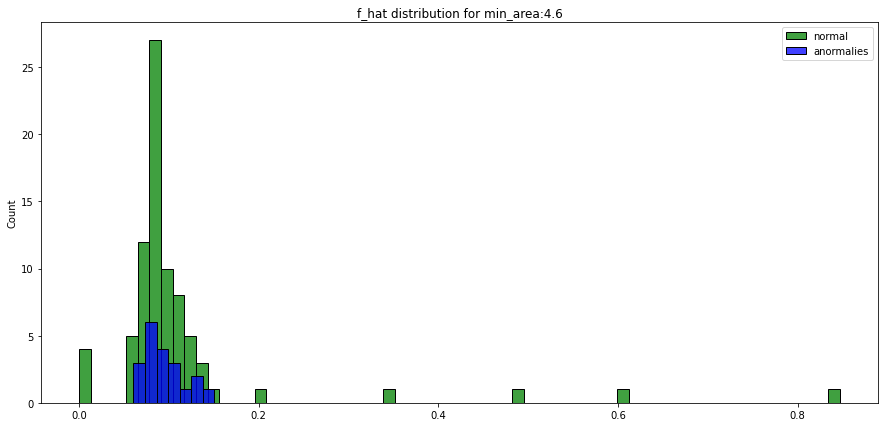

––– ––– ––– new round: i=0, mu :1.05  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=1, mu :1.75  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=2, mu :1.85  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=3, mu :1.95  ––– ––– –––
 correct results: 20,  percentage: 0.2
auroc:  0.5
auroc:  0.5
auroc:  0.5
auroc:  0.5


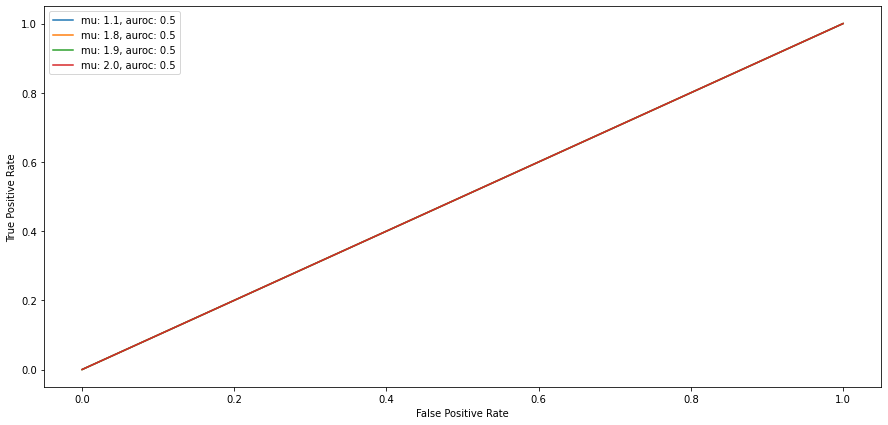

iteration:  1
num datapoints: 100
cutoff (patterns.py):  10
----- 0 data points processed -----
----- 10 data points processed -----
----- 20 data points processed -----
----- 30 data points processed -----
----- 40 data points processed -----
----- 50 data points processed -----
----- 60 data points processed -----
----- 70 data points processed -----
----- 80 data points processed -----
----- 90 data points processed -----


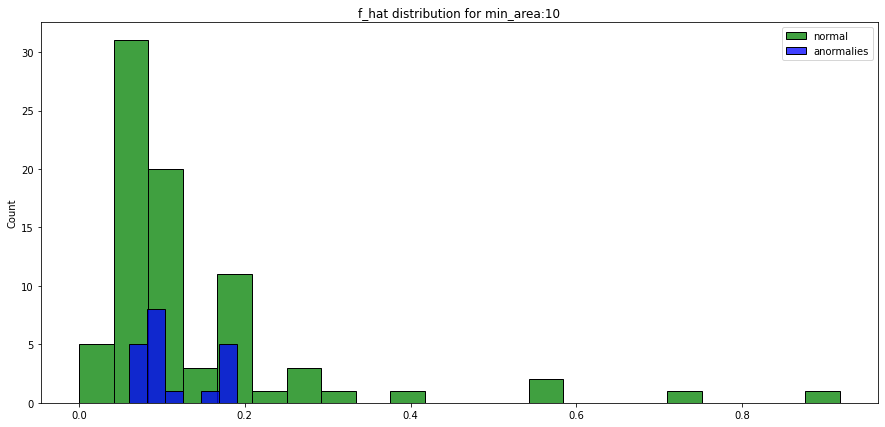

––– ––– ––– new round: i=0, mu :1.05  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=1, mu :1.75  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=2, mu :1.85  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=3, mu :1.95  ––– ––– –––
 correct results: 20,  percentage: 0.2
auroc:  0.5
auroc:  0.5
auroc:  0.5
auroc:  0.5


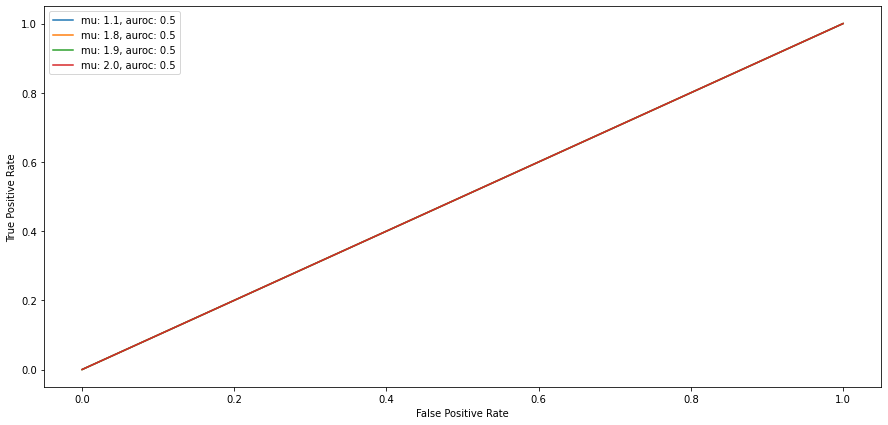

iteration:  2
num datapoints: 100
cutoff (patterns.py):  20
----- 0 data points processed -----
ERROR: Unable to clone Pyomo component attribute. Component
    'enforce_point_left_of_pattern_index' contains an uncopyable field
    '_init_dimen' (<class 'pyomo.core.base.initializer.ConstantInitializer'>).
    Setting field to `None` on new object
----- 10 data points processed -----
----- 20 data points processed -----
----- 30 data points processed -----
----- 40 data points processed -----
----- 50 data points processed -----
----- 60 data points processed -----
----- 70 data points processed -----
----- 80 data points processed -----
----- 90 data points processed -----


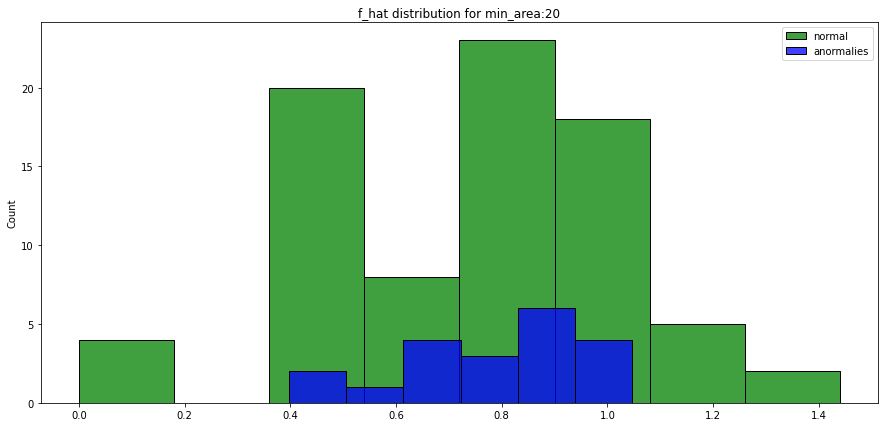

––– ––– ––– new round: i=0, mu :1.05  ––– ––– –––
 correct results: 28,  percentage: 0.28
––– ––– ––– new round: i=1, mu :1.75  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=2, mu :1.85  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=3, mu :1.95  ––– ––– –––
 correct results: 20,  percentage: 0.2
auroc:  0.53125
auroc:  0.5
auroc:  0.5
auroc:  0.5


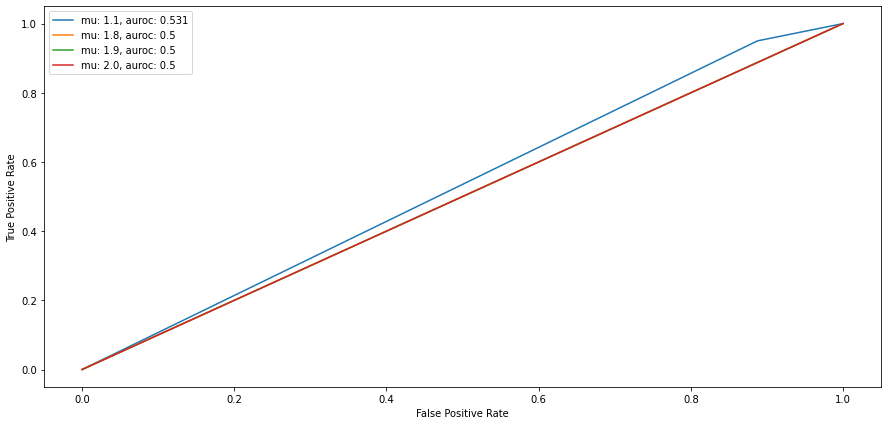

iteration:  3
num datapoints: 100
cutoff (patterns.py):  30
----- 0 data points processed -----
----- 10 data points processed -----
----- 20 data points processed -----
----- 30 data points processed -----
----- 40 data points processed -----
----- 50 data points processed -----
----- 60 data points processed -----
----- 70 data points processed -----
----- 80 data points processed -----
----- 90 data points processed -----


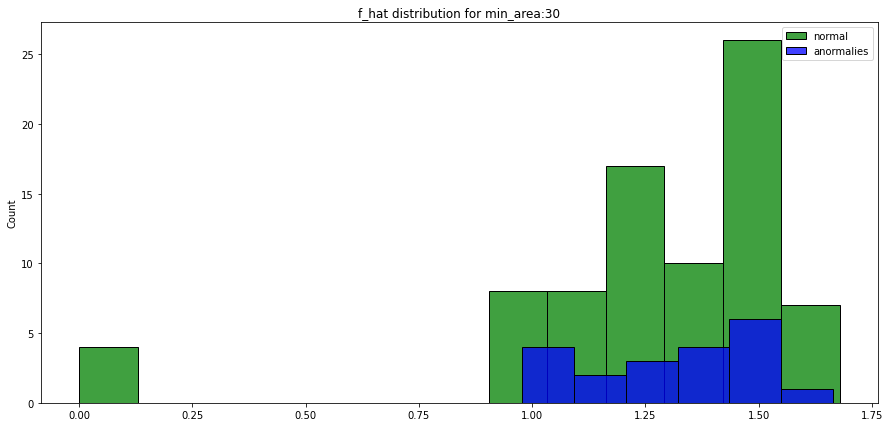

––– ––– ––– new round: i=0, mu :1.05  ––– ––– –––
 correct results: 69,  percentage: 0.69
––– ––– ––– new round: i=1, mu :1.75  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=2, mu :1.85  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=3, mu :1.95  ––– ––– –––
 correct results: 20,  percentage: 0.2
auroc:  0.48749999999999993
auroc:  0.5
auroc:  0.5
auroc:  0.5


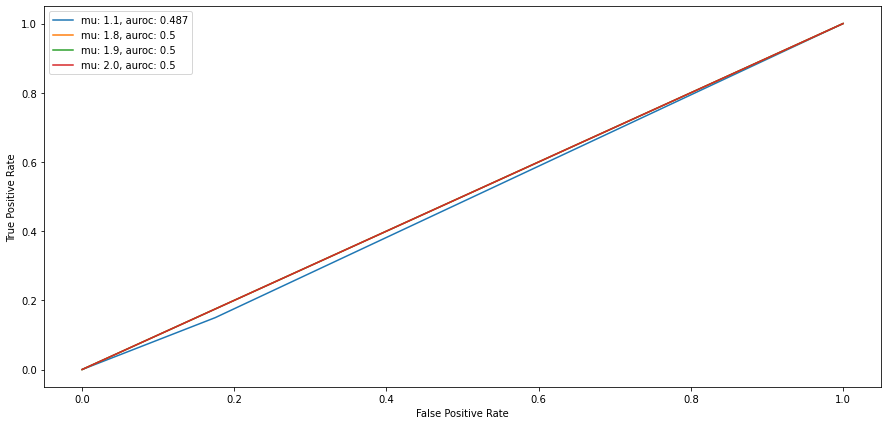

iteration:  4
num datapoints: 100
cutoff (patterns.py):  46
----- 0 data points processed -----
----- 10 data points processed -----
----- 20 data points processed -----
----- 30 data points processed -----
----- 40 data points processed -----
----- 50 data points processed -----
----- 60 data points processed -----
----- 70 data points processed -----
----- 80 data points processed -----
----- 90 data points processed -----


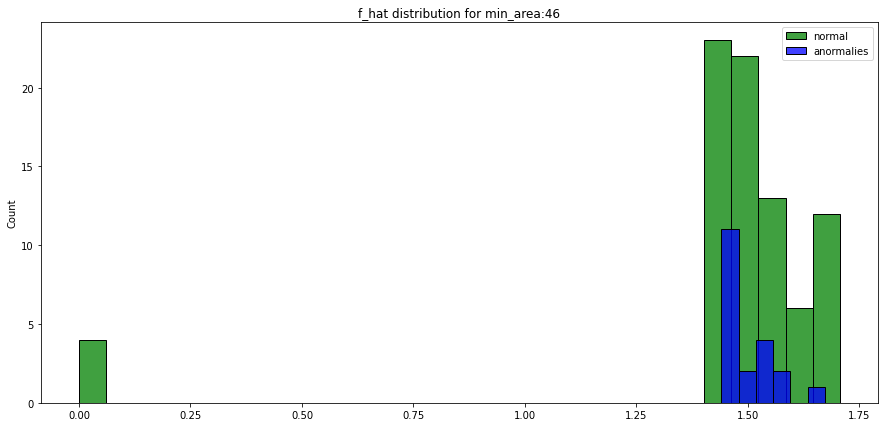

––– ––– ––– new round: i=0, mu :1.05  ––– ––– –––
 correct results: 76,  percentage: 0.76
––– ––– ––– new round: i=1, mu :1.75  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=2, mu :1.85  ––– ––– –––
 correct results: 20,  percentage: 0.2
––– ––– ––– new round: i=3, mu :1.95  ––– ––– –––
 correct results: 20,  percentage: 0.2
auroc:  0.475
auroc:  0.5
auroc:  0.5
auroc:  0.5


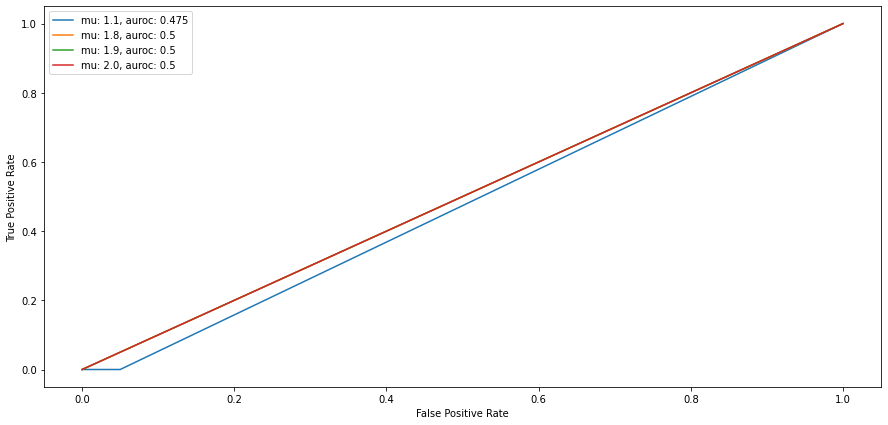

In [4]:
# creating a range of taus
# taus = [0.00001, 0.0001, 0.001, 0.01 , 0.1, 0.2, 0.3, 0.5, 1.0] # np.linspace(start=0.1,stop=1.0,num=5)

taus = [1.0, 1.7, 1.8, 1.9]
min_areas = [4.6, 10, 20, 30, 46]
epsilon = 0.1

for i, min_area in enumerate(min_areas):
    print("iteration: ", i)

    f_hats = calculate_f_hats(X, y, min_area)
    
    evaluate_fhat_distribution(f_hats)

    predictions_list = []

    for i, tau in enumerate(taus):
        print(f"––– ––– ––– new round: i={i}, mu :{(tau + (epsilon/2))}  ––– ––– –––")
        
        predictions = np.asarray(f_hats) < (tau + (epsilon/2))
        predictions_list.append([tau + (epsilon/2), min_area, predictions])

        preds = np.where(predictions==1, predictions, False).astype(bool)
        count_similar_predictions = np.count_nonzero(y == preds)
        per_similar_predictions = count_similar_predictions/len(y)
        print(f" correct results: {count_similar_predictions},  percentage: {per_similar_predictions}")


    for i, (tau,_,p) in enumerate(predictions_list):

        auc = metrics.roc_auc_score(y, p)

        # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
        print("auroc: ",auc)

        fpr, tpr, _ = metrics.roc_curve(y, p)
        
        #create ROC curve
        plt.plot(fpr,tpr, label=f"mu: {np.round(tau+(epsilon/2), 3)}, auroc: {np.round(auc,3)}")
        plt.legend(loc="upper left")
        #print(fpr,tpr)

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Ongoing: Solving the min area equation with sympy

In [5]:
# import sympy
# #from sympy import *
# from sympy.abc import x
# from sympy import solve_rational_inequalities, Poly, Symbol

# #x = Symbol('x', real=True)

# N = 100
# v = 2*3
# delta = 0.1
# epsilon = 0.1


# solve_rational_inequalities(
#     [[
#         (Poly(x**2), Poly((1/N) * (256/(epsilon**2)) * ( v * sympy.log((256/(epsilon**2)) * (1/(x**2))) + sympy.log(8/delta))), '>=')
#     ]]
# )
